In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##
penn_state_path = Path.home()/'iCloud'/'penn_state_synca_data'/'dig'/'synca1_5slot_scan'
penn_state_result = '230104_synca1_5slot_scan_beamforming_results.npz'
##
jugaad_path = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'
jugaad_beamforming = '230105_beamforming_max_power.npy'
jugaad_power = '230105_jugaad_total_power.npy'
##
cresana_path = Path.home()/'iCloud'/'jugaad_data'/'beamforming'
cresana_beamforming = 'cresana_beamforming_amplitude.npy'
cresana_power = 'cresana_perfect_phase_amplitude.npy'


In [2]:
penn_state_data = np.load(penn_state_path/penn_state_result)
penn_state_beam_max = penn_state_data['max_val']
# exclude negative axial positions
penn_state_beam_max = penn_state_beam_max[3:, :]
# exclude negative radial positions
penn_state_beam_max = penn_state_beam_max[:, 2:]
penn_state_beam_max = np.sqrt(np.flip(penn_state_beam_max.T, axis=0))
##
penn_state_tot_power = penn_state_data['max_val_ideal_phase']
# exclude negative axial positions
penn_state_tot_power = penn_state_tot_power[3:, :]
# exclude negative radial positions
penn_state_tot_power = penn_state_tot_power[:, 2:]
penn_state_tot_power = np.sqrt(np.flip(penn_state_tot_power.T, axis=0))


In [4]:
jugaad_beam_max = np.load(jugaad_path/jugaad_beamforming)
#jugaad_beam_max = np.mean(jugaad_beam_max, axis=-1)
#jugaad_beam_max = jugaad_beam_max[:,:,101]
jugaad_beam_max = np.flip(jugaad_beam_max, axis=0)

jugaad_tot_power = np.load(jugaad_path/jugaad_power)
#jugaad_tot_power = np.mean(jugaad_tot_power, axis=-1)
#jugaad_tot_power = jugaad_tot_power[:,:,101]
jugaad_tot_power = np.flip(jugaad_tot_power, axis=0)

In [3]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.25)

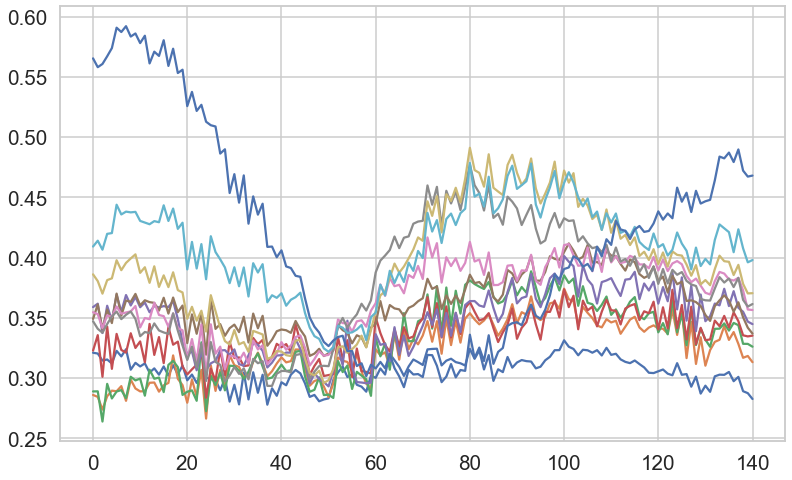

In [17]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)
i_ax = 0

for i_rad in range(jugaad_beam_max.shape[0]):
    
    ax.plot(jugaad_beam_max[i_rad, i_ax, :])

    

In [ ]:
fig = plt.figure(figsize=(13,8))
axs = []
hists = []
axial_ind = 0

for i, i_rad in enumerate([0,2,4,6]):
    axs.append(fig.add_subplot(2,2,i))
    hists.append(axs[i].histogram())

    